# Question_6: Plot how the average delay time evolves through the week

In [33]:
import src.data_processing.data as data
import matplotlib.pyplot as plt
import pandas as pd

In [34]:
trips = data.full_trips

In [35]:
avg_delay = trips.groupby("Date of departure")["Delay time"].mean().reset_index()
avg_delay = pd.concat([avg_delay.iloc[1:], avg_delay.iloc[:1]])
avg_delay

,Date of departure,Delay time
1,2020-09-21,151.742627
2,2020-09-22,128.063268
3,2020-09-23,106.503931
4,2020-09-24,95.965393
5,2020-09-25,138.264277
6,2020-09-26,112.531570
0,2020-09-20,122.506815


In [36]:
avg_delay["Date of departure"] = pd.to_datetime(avg_delay["Date of departure"], format = '%Y-%m-%d').dt.day_name()

In [37]:
avg_delay

,Date of departure,Delay time
1,Monday,151.742627
2,Tuesday,128.063268
3,Wednesday,106.503931
4,Thursday,95.965393
5,Friday,138.264277
6,Saturday,112.531570
0,Sunday,122.506815


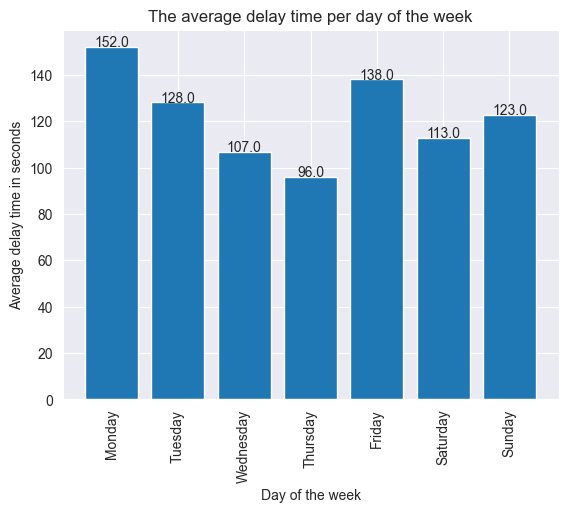

In [38]:
def addvaluelabels(x,y):
    for i in range(len(x)):
        plt.text(i, y.iloc[i], y.iloc[i], ha='center')
addvaluelabels(avg_delay["Date of departure"] , avg_delay["Delay time"].round(0))
plt.title('The average delay time per day of the week')
plt.xlabel("Day of the week")
plt.ylabel("Average delay time in seconds")
plt.bar(avg_delay["Date of departure"] , avg_delay["Delay time"])
plt.xticks(rotation=90)
plt.show()

# EXTRA INSIGHT: Delay time for the 5 most used stations
# is there a link with the size of the city & the average delay time

In [40]:
trips = trips[(trips["Name of the stop"] == "brussel-noord/bruxelles-nord") | (trips["Name of the stop"] == "brussel-zuid/bruxelles-midi") | (trips["Name of the stop"] == "brussel-centraal/bruxelles-central") | (trips["Name of the stop"] == "gent-sint-pieters") | (trips["Name of the stop"] == "antwerpen-centraal")]

In [41]:
trips.head(10)

,Unnamed: 0,Date of departure,Train number,Relation,Railway operators,Railway of departure,Time of real arrival,Time of real departure,Time of planned arrival,Time of planned departure,Direction of relation,Name of the stop,Railway of arrival,Date of planned arrival,Date of planned departure,Date of real arrival,Date of real departure,Delay time
217,217,2020-09-20,12,ICE,SNCB/NMBS,0/2,2020-09-20 19:46:52,2020-09-20 19:48:07,2020-09-20 19:26:00,2020-09-20 19:28:00,ICE: FRANKFURT(MAIN) HBF -> BRUSSEL-ZUID,brussel-noord/bruxelles-nord,36N,2020-09-20,2020-09-20,2020-09-20,2020-09-20,1252
221,221,2020-09-20,12,ICE,SNCB/NMBS,NaN,2020-09-20 19:54:34,NaT,2020-09-20 19:35:00,NaT,ICE: FRANKFURT(MAIN) HBF -> BRUSSEL-ZUID,brussel-zuid/bruxelles-midi,0/2,2020-09-20,NaT,2020-09-20,NaT,1174
288,288,2020-09-20,12,ICE,SNCB/NMBS,0/2,2020-09-20 19:50:57,2020-09-20 19:50:57,2020-09-20 19:31:00,2020-09-20 19:31:00,ICE: FRANKFURT(MAIN) HBF -> BRUSSEL-ZUID,brussel-centraal/bruxelles-central,0/2,2020-09-20,2020-09-20,2020-09-20,2020-09-20,1197
541,541,2020-09-20,3330,IC 22,SNCB/NMBS,0/6,2020-09-20 10:27:21,2020-09-20 10:28:33,2020-09-20 10:26:00,2020-09-20 10:27:00,IC 22: ANTWERPEN-CENTRAAL -> BRUSSEL-ZUID,brussel-centraal/bruxelles-central,0/6,2020-09-20,2020-09-20,2020-09-20,2020-09-20,81
543,543,2020-09-20,3330,IC 22,SNCB/NMBS,NaN,2020-09-20 10:32:24,NaT,2020-09-20 10:31:00,NaT,IC 22: ANTWERPEN-CENTRAAL -> BRUSSEL-ZUID,brussel-zuid/bruxelles-midi,0/6,2020-09-20,NaT,2020-09-20,NaT,84
557,557,2020-09-20,3319,IC 22,SNCB/NMBS,25,2020-09-20 19:36:51,2020-09-20 19:38:14,2020-09-20 19:36:00,2020-09-20 19:38:00,IC 22: BRUSSEL-ZUID -> ANTWERPEN-CENTRAAL,brussel-noord/bruxelles-nord,0/5,2020-09-20,2020-09-20,2020-09-20,2020-09-20,51
582,582,2020-09-20,3319,IC 22,SNCB/NMBS,0/5,NaT,2020-09-20 19:29:04,NaT,2020-09-20 19:28:00,IC 22: BRUSSEL-ZUID -> ANTWERPEN-CENTRAAL,brussel-zuid/bruxelles-midi,NaN,NaT,2020-09-20,NaT,2020-09-20,0
586,586,2020-09-20,3319,IC 22,SNCB/NMBS,0/5,2020-09-20 19:32:11,2020-09-20 19:33:22,2020-09-20 19:31:00,2020-09-20 19:32:00,IC 22: BRUSSEL-ZUID -> ANTWERPEN-CENTRAAL,brussel-centraal/bruxelles-central,0/5,2020-09-20,2020-09-20,2020-09-20,2020-09-20,71
595,595,2020-09-20,3316,IC 22,SNCB/NMBS,0/5,NaT,2020-09-20 16:31:09,NaT,2020-09-20 16:28:00,IC 22: BRUSSEL-ZUID -> ANTWERPEN-CENTRAAL,brussel-zuid/bruxelles-midi,NaN,NaT,2020-09-20,NaT,2020-09-20,0
597,597,2020-09-20,3316,IC 22,SNCB/NMBS,0/5,2020-09-20 16:34:15,2020-09-20 16:35:49,2020-09-20 16:31:00,2020-09-20 16:32:00,IC 22: BRUSSEL-ZUID -> ANTWERPEN-CENTRAAL,brussel-centraal/bruxelles-central,0/5,2020-09-20,2020-09-20,2020-09-20,2020-09-20,195


In [43]:
avg_delayBigCities = trips.groupby("Date of departure")["Delay time"].mean().reset_index()
avg_delayBigCities = pd.concat([avg_delayBigCities.iloc[1:], avg_delayBigCities.iloc[:1]])
avg_delayBigCities

,Date of departure,Delay time
1,2020-09-21,153.495175
2,2020-09-22,135.042114
3,2020-09-23,103.080069
4,2020-09-24,85.096781
5,2020-09-25,140.171313
6,2020-09-26,117.713618
0,2020-09-20,143.982633


In [44]:
avg_delayBigCities["Date of departure"] = pd.to_datetime(avg_delayBigCities["Date of departure"], format = '%Y-%m-%d').dt.day_name()

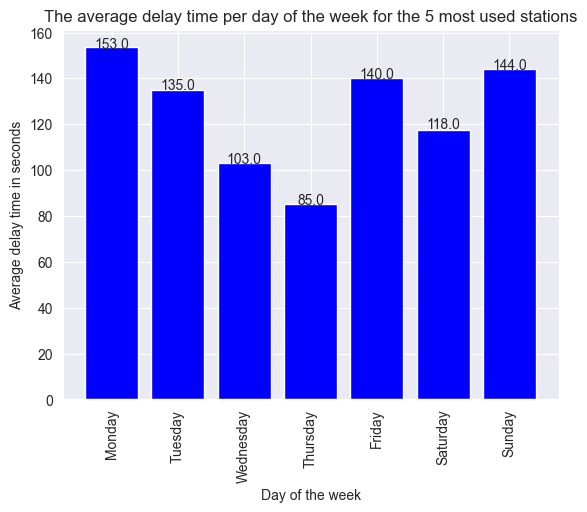

In [47]:
def addvaluelabels(x,y):
    for i in range(len(x)):
        plt.text(i, y.iloc[i], y.iloc[i], ha='center')
addvaluelabels(avg_delayBigCities["Date of departure"] , avg_delayBigCities["Delay time"].round(0))
plt.title('The average delay time per day of the week for the 5 most used stations')
plt.xlabel("Day of the week")
plt.ylabel("Average delay time in seconds")
plt.bar(avg_delayBigCities["Date of departure"] , avg_delayBigCities["Delay time"], color = 'blue')
plt.xticks(rotation=90)
plt.show()